In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats.distributions import chi2
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [5]:
def eu_exact(K, r, s0, sigma):
    d1 = 1 / sigma * (np.log(s0 / K) + r + sigma ** 2 / 2)
    d2 = d1 - sigma
    res = s0 * norm(0, 1).cdf(d1) - K * np.exp(-r) * norm(0, 1).cdf(d2)
    return res * np.exp(-r)

In [7]:
eu_exact(100, 0.05, 100, 0.25)

11.734365163176058

In [8]:
def eu_option_cmc(K, r, s0, sigma, R, seed = 2022):
    np.random.seed(seed)
    x = np.random.normal(0, 1, R)
    mis = r - sigma ** 2 / 2
    An = s0 * np.exp(mis + sigma * x)
    Yk = np.maximum(An - K, 0)
    #Yk[Yk < 0] = 0
    Yhat = np.mean(Yk)
    return Yhat * np.exp(-r)

In [9]:
eu_option_cmc(100, 0.05, 100, 0.25, 1000, seed=2)

11.656261305499665

In [8]:
def eu_option_ant(K, r, s0, sigma, R, seed = 2022):
    np.random.seed(seed)
    x = np.zeros(R)
    z = np.random.normal(0, 1, int(R / 2))
    x[range(0, R, 2)] = z
    x[range(1, R + 1, 2)] = -z
    mis = r - sigma ** 2 / 2
    An = s0 * np.exp(mis + sigma * x)
    Yk = np.maximum(An - K, 0)
    #Yk[Yk < 0] = 0
    Yhat = np.mean(Yk)
    return Yhat

In [9]:
eu_option_ant(100, 0.05, 100, 0.25, 1000, seed=2022)

13.001029256321777

In [114]:
def eu_option_ant_inv(K, r, s0, sigma, R, seed = 2022):
    np.random.seed(seed)
    x = np.zeros(R)
    u = np.random.uniform(0, 1, int(R / 2))
    x[range(0, R, 2)] = u
    x[range(1, R + 1, 2)] = 1 - u
    x = norm(0, 1).ppf(x)
    mis = r - sigma ** 2 / 2
    An = s0 * np.exp(mis + sigma * x)
    Yk = np.maximum(An - K, 0)
    #Yk[Yk < 0] = 0
    Yhat = np.mean(Yk)
    return Yhat

In [126]:
eu_option_ant_inv(100, 0.05, 100, 0.25, 1000, seed=2022)

13.619320304009403

In [15]:
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
z = np.random.normal(0, 1, 1000)

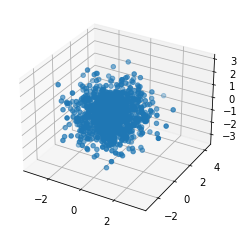

In [16]:
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(x, y, z)
plt.show()

In [18]:
d_vec = np.sqrt(x ** 2 + y ** 2 + z ** 2)
x_norm = x / d_vec
y_norm = y / d_vec
z_norm = z / d_vec

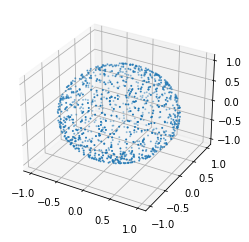

In [20]:
fig2 = plt.figure(1)
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(x_norm, y_norm, z_norm, s=1)
plt.show()

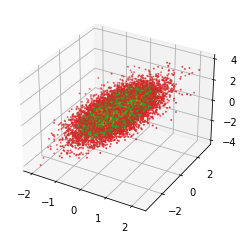

In [10]:
m = 4
R = 10000
fig3 = plt.figure(1)
ax3 = fig3.add_subplot(111, projection='3d')
for j in np.arange(m) + 1:
    u = np.random.random(int(R / m))
    v = u / m + (j - 1) / m
    D = np.sqrt(chi2.ppf(v, df=3))
    Z = np.array([np.random.normal(0, 1, int(R / m)), np.random.normal(0, 1, int(R / m)), np.random.normal(0, 1, int(R / m))]).T
    d_vec = np.sqrt(Z[:,0] ** 2 + Z[:,1] ** 2 + Z[:,2] ** 2)
    Z = (Z.T * 1 / d_vec).T
    sigma = np.array([1,1,1,1,2,2,1,2,3]) / 3
    sigma.shape = (3,3)
    A = np.linalg.cholesky(sigma)
    X = np.dot(A, Z.T).T
    ax3.scatter(X[:, 0] * D, X[:, 1] * D, X[:, 2] * D, s=1, label=j)

plt.show()


In [70]:
Z = (Z.T * 1 / d_vec).T

In [69]:
Z = np.array([np.random.normal(0, 1, int(R / m)), np.random.normal(0, 1, int(R / m)), np.random.normal(0, 1, int(R / m))]).T
d_vec = np.sqrt(Z[:,0] ** 2 + Z[:,1] ** 2 + Z[:,2] ** 2)

In [67]:
Z[:,0] = Z[:,0] / d_vec
Z[:,1] = Z[:,1] / d_vec
Z[:,2] = Z[:,2] / d_vec

In [80]:
sigma = np.array([1,1,1,1,2,2,1,2,3]) / 3
sigma.shape = (3,3)

In [77]:
sigma

array([[[0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.66666667,
         0.66666667, 0.33333333, 0.66666667, 1.        ]]])

In [82]:
A = np.linalg.cholesky(sigma)